<h1>Evolution of the NBA - Exploratory Data Analysis</h1>

In [1]:
#Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Load dataset
team_summ = pd.read_csv("~/Documents/Python/Basketball_EDA/data/Team Summaries.csv")
team_tot = pd.read_csv("~/Documents/Python/Basketball_EDA/data/Team Totals.csv")
possessions = pd.read_csv("~/Documents/Python/Basketball_EDA/data/Per 100 Poss.csv")
team_stat = pd.read_csv("~/Documents/Python/Basketball_EDA/data/Team Stats Per Game.csv")
advanced = pd.read_csv("~/Documents/Python/Basketball_EDA/data/Advanced.csv")
shooting = pd.read_csv("~/Documents/Python/Basketball_EDA/data/Player Shooting.csv")
player_tot = pd.read_csv("~/Documents/Python/Basketball_EDA/data/Player Totals.csv")


In [18]:
df=team_tot.copy()
df.columns

Index(['season', 'lg', 'team', 'abbreviation', 'playoffs', 'g', 'mp', 'fg',
       'fga', 'fg_percent', 'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa',
       'x2p_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        1845 non-null   int64  
 1   lg            1845 non-null   object 
 2   team          1845 non-null   object 
 3   abbreviation  1758 non-null   object 
 4   playoffs      1845 non-null   bool   
 5   g             1844 non-null   float64
 6   mp            1655 non-null   float64
 7   fg            1844 non-null   float64
 8   fga           1844 non-null   float64
 9   fg_percent    1844 non-null   float64
 10  x3p           1402 non-null   float64
 11  x3pa          1402 non-null   float64
 12  x3p_percent   1402 non-null   float64
 13  x2p           1844 non-null   float64
 14  x2pa          1844 non-null   float64
 15  x2p_percent   1844 non-null   float64
 16  ft            1844 non-null   float64
 17  fta           1844 non-null   float64
 18  ft_percent    1844 non-null 

In [21]:
df.describe()

,season,g,mp,fg,fga,fg_percent,x3p,x3pa,x3p_percent,x2p,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,1845.000000,1844.000000,1655.000000,1844.000000,1844.000000,1844.000000,1402.000000,1402.000000,1402.000000,1844.000000,...,1844.000000,1515.000000,1515.000000,1792.000000,1844.000000,1456.000000,1456.000000,1527.000000,1844.000000,1844.000000
mean,1992.268835,79.490239,19482.717221,3151.273319,6947.267354,0.451986,440.756776,1252.706847,0.331781,2816.164317,...,0.751556,1026.310891,2496.662706,3692.981585,1831.177874,653.697115,404.907967,1287.526523,1825.329176,8265.425163
std,20.473154,6.878088,1371.888079,500.530939,847.026635,0.036941,306.879170,824.955716,0.047158,611.318884,...,0.032146,219.165480,265.174605,608.062834,321.520455,105.851369,82.585512,219.906019,261.416255,1176.298696
min,1947.000000,11.000000,2640.000000,432.000000,1020.000000,0.246000,6.000000,24.000000,0.104000,426.000000,...,0.590000,202.000000,348.000000,550.000000,215.000000,72.000000,39.000000,196.000000,253.000000,1087.000000
25%,1976.000000,82.000000,19755.000000,2967.000000,6577.000000,0.442000,173.250000,543.000000,0.316000,2405.000000,...,0.734000,871.000000,2379.500000,3403.000000,1695.000000,585.000000,350.000000,1146.500000,1672.000000,7932.750000
50%,1994.000000,82.000000,19805.000000,3214.000000,6997.500000,0.458000,414.000000,1181.500000,0.346000,2646.500000,...,0.753000,1014.000000,2495.000000,3565.000000,1863.000000,646.500000,398.000000,1252.000000,1844.000000,8472.500000
75%,2010.000000,82.000000,19855.000000,3492.500000,7425.250000,0.473250,635.750000,1757.000000,0.363000,3414.000000,...,0.772000,1169.000000,2651.000000,3798.250000,2036.000000,717.000000,454.000000,1420.000000,2013.000000,9002.250000
max,2024.000000,84.000000,20460.000000,4059.000000,9295.000000,0.545000,1363.000000,3721.000000,0.428000,4018.000000,...,0.839000,1845.000000,3316.000000,6131.000000,2575.000000,1059.000000,716.000000,2011.000000,2470.000000,10371.000000


<h2>Scoring Trends</h2>

- How have average PPG changed over time?
- How has the distribution of points by different shot types (2p, 3p) evolved over time?

,Year,Average PPG
0,1950,5282.722222
1,1951,5410.333333
2,1952,5524.181818
3,1953,5806.000000
4,1954,5726.600000
...,...,...
70,2020,7892.935484
71,2021,8070.580645
72,2022,9070.516129
73,2023,9404.225806


Text(0, 0.5, 'Average Team PPG')

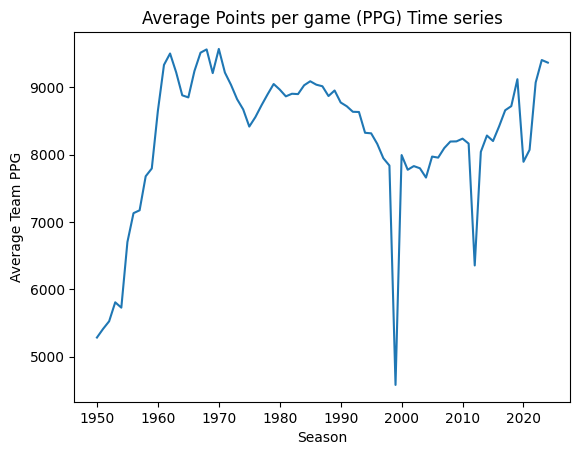

In [5]:
#Team PPG trend
#Filter to where lg = NBA
ppg = team_tot[team_tot['lg'] == 'NBA']

#Group by season
team_ppg = ppg.groupby('season')['pts'].mean().reset_index()
team_ppg.columns = ['Year', 'Average PPG']

display(team_ppg)

plt.plot(team_ppg['Year'], team_ppg['Average PPG'])
plt.title("Average Team Points per game (PPG) Time series")
plt.xlabel("Season")
plt.ylabel("Average Team PPG")



Observations:
* The early introduction of the NBA saw average points per game quite low but as the years passed, started to increase.
* Gradual increase through the 50s
* Steep decline just before the 2000s due to the lockout, and again in 2011
* Modern NBA bringing the average up.



In [6]:
#Distribution of points

#Filter by NBA
nba = team_tot[team_tot['lg'] == 'NBA']
nba=nba.copy()

#Calculate points from different shot types
nba.loc[:,'pts_2p'] = 2 * nba.loc[:,'x2p']
nba.loc[:,'pts_3p'] = 3 * nba.loc[:,'x3p']
nba.loc[:,'pts_ft'] = nba.loc[:,'ft']


#Calculate proportions
nba.loc[:,'prop_2p'] = nba.loc[:,'pts_2p']/nba.loc[:,'pts']
nba.loc[:,'prop_3p'] = nba.loc[:,'pts_3p']/nba.loc[:,'pts']
nba.loc[:,'prop_ft'] = nba.loc[:,'pts_ft']/nba.loc[:,'pts']

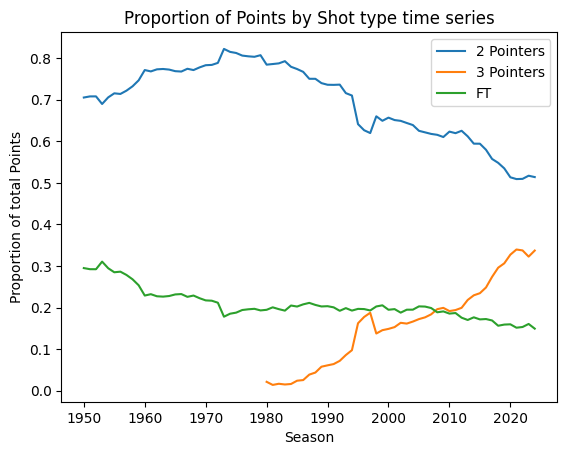

In [7]:
prop_by_season = nba.groupby('season')[['prop_2p', 'prop_3p', 'prop_ft']].mean().reset_index()

plt.plot(prop_by_season['season'], prop_by_season['prop_2p'], label = "2 Pointers")
plt.plot(prop_by_season['season'], prop_by_season['prop_3p'], label = "3 Pointers")
plt.plot(prop_by_season['season'], prop_by_season['prop_ft'], label = "FT")
plt.xlabel("Season")
plt.ylabel("Proportion of total Points")
plt.title("Proportion of Points by Shot type time series")
plt.legend()


Text(0.5, 1.0, 'Proportion of Points by Shot type time series')

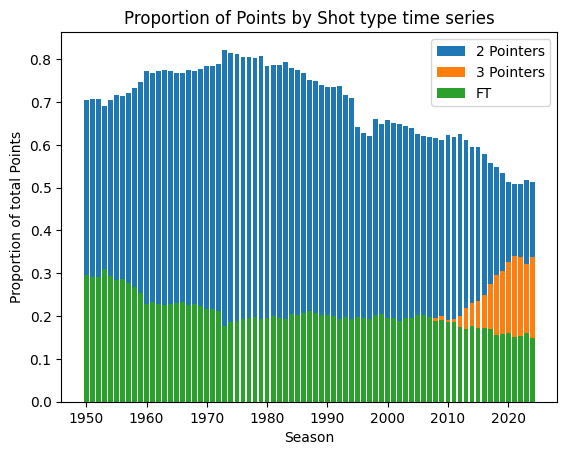

In [8]:
plt.bar(prop_by_season['season'], prop_by_season['prop_2p'], label = "2 Pointers")
plt.bar(prop_by_season['season'], prop_by_season['prop_3p'], label = "3 Pointers")
plt.bar(prop_by_season['season'], prop_by_season['prop_ft'], label = "FT")
plt.legend()
plt.xlabel("Season")
plt.ylabel("Proportion of total Points")
plt.title("Proportion of Points by Shot type time series")


2 Pointers still remain as one of the best options to score the ball. But has seen a slow decrease since the 70s, when the 3 point line was introduced, as well as a shift in play style and strategy
The number of three pointers have gone up in the modern NBA
FT steady decline. As 3 point shooting goes up, less likely to foul

In [34]:
display(shooting.columns)
#shooting.groupby('season')[['percent_fga_from_x0_3_range','percent_fga_from_x3_10_range','percent_fga_from_x10_16_range','percent_fga_from_x16_3p_range','percent_fga_from_x3p_range']].mean().reset_index()

df_layups = shooting.groupby('season')[['percent_fga_from_x0_3_range','percent_fga_from_x3_10_range']].mean().reset_index()
df_layups['layups/dunks'] = df_layups['percent_fga_from_x0_3_range'] + df_layups['percent_fga_from_x3_10_range'] / 2


df_mid = shooting.groupby('season')[['percent_fga_from_x10_16_range','percent_fga_from_x16_3p_range']].mean().reset_index()
df_mid['midrange'] = df_mid['percent_fga_from_x10_16_range']+df_mid['percent_fga_from_x16_3p_range'] / 2

df_three = shooting.groupby('season')['percent_fga_from_x3p_range'].mean().reset_index()

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'mp', 'fg_percent', 'avg_dist_fga',
       'percent_fga_from_x2p_range', 'percent_fga_from_x0_3_range',
       'percent_fga_from_x3_10_range', 'percent_fga_from_x10_16_range',
       'percent_fga_from_x16_3p_range', 'percent_fga_from_x3p_range',
       'fg_percent_from_x2p_range', 'fg_percent_from_x0_3_range',
       'fg_percent_from_x3_10_range', 'fg_percent_from_x10_16_range',
       'fg_percent_from_x16_3p_range', 'fg_percent_from_x3p_range',
       'percent_assisted_x2p_fg', 'percent_assisted_x3p_fg',
       'percent_dunks_of_fga', 'num_of_dunks', 'percent_corner_3s_of_3pa',
       'corner_3_point_percent', 'num_heaves_attempted', 'num_heaves_made'],
      dtype='object')

,season,percent_fga_from_x3p_range
0,1997,0.195562
1,1998,0.157774
2,1999,0.155952
3,2000,0.155715
4,2001,0.149810
5,2002,0.164268
6,2003,0.156915
7,2004,0.158675
8,2005,0.181257
9,2006,0.181578


Text(0.5, 1.0, 'Percentage of Total Shot Attempts by Shot Type')

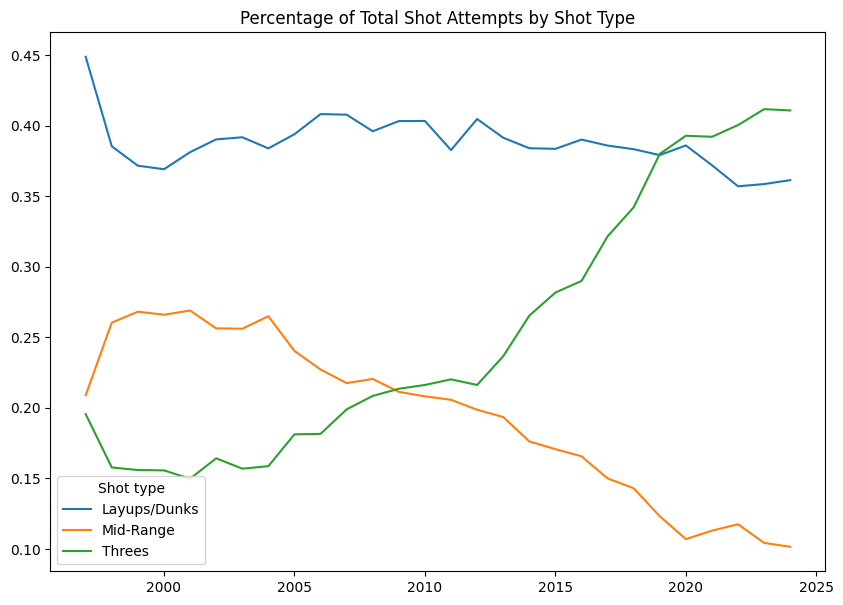

In [38]:
plt.figure(figsize=(10,7))

plt.plot(df_layups['season'], df_layups['layups/dunks'], label = "Layups/Dunks")
plt.plot(df_mid['season'], df_mid['midrange'], label = "Mid-Range")
plt.plot(df_three['season'], df_three['percent_fga_from_x3p_range'], label = "Threes")
plt.legend(title = "Shot type",loc = 3)
plt.title("Percentage of Total Shot Attempts by Shot Type")


,Year,Average Distance
0,1997,12.481086
1,1998,12.454779
2,1999,12.581113
3,2000,12.513765
4,2001,11.387218
5,2002,11.452918
6,2003,11.382988
7,2004,11.506529
8,2005,11.620926
9,2006,11.417710


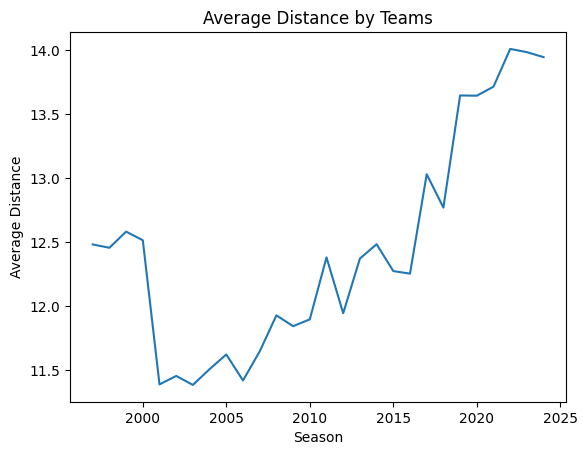

In [10]:
#Averae distance attempted by teams
shooting.groupby('season')['avg_dist_fga'].mean().plot(kind='line')
plt.title("Average Distance by Teams")
plt.xlabel("Season")
plt.ylabel("Average Distance")

distance = shooting.groupby('season')['avg_dist_fga'].mean().reset_index()
distance.columns = ["Year", "Average Distance"]

display(distance)


Observations:

* The percentage of total field goal attempts, three pointers have boomed in the early 2010s, with midrange shots on a decline.
* The average distance teams were shooting also continued to increase. 
* The proportion of how points are scored showed 2 pointers were declining, due to the rapid increase in 3 point shots.


Around 2013 was the start of the three point era in the NBA, where spacing the floor and having perimeter shooters were essential. NBA teams continued to implement this style of play as teams discovered that having players who could space the floor were key to having a higher production.
This also led to a massive decline in taking mid range jumpshots, which is now deemed as one of the most unproductive shots in the NBA.

To be successful in the modern NBA, it was essential to have players to shoot and space the floor for slashers or low post players. The teams who saw the most success, and the pioneers of the three point era, were the Golden State Warriors. This team revolved around Stephen Curry and Klay Thompson. These two players were such a threat to shoot the three that it opened the floor for other players to be successful. Their volume of 3pt attempts against the league average shown below and they are far and away above the league average.

Text(0.5, 0, 'Season')

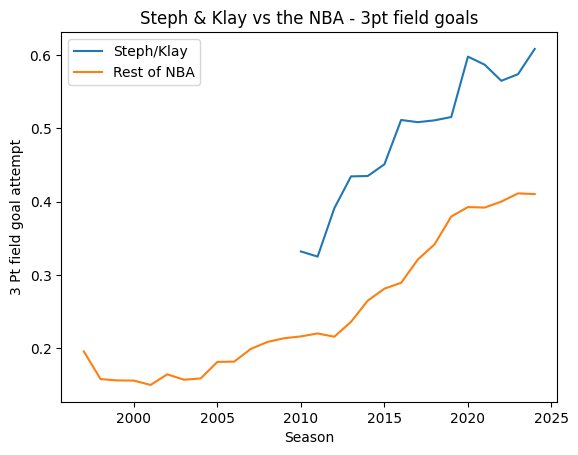

In [181]:
#Steph and Klay vs league average
poi = ['Stephen Curry', 'Klay Thompson']
gsw = shooting[shooting['player'].isin(poi)]
gsw_plot = gsw.groupby('season')['percent_fga_from_x3p_range'].mean().reset_index()
gsw_plot.rename(columns={"percent_fga_from_x3p_range":"fga_3pt"})

#Rest of league
rest_of_league = shooting[shooting['player'].isin(poi) == False]
rest_of_league_plot = rest_of_league.groupby('season')['percent_fga_from_x3p_range'].mean().reset_index()
rest_of_league_plot.rename(columns={"percent_fga_from_x3p_range":"fga_3pt"})


sns.lineplot(data=gsw_plot, x = 'season', y = 'percent_fga_from_x3p_range', label = "Steph/Klay")
sns.lineplot(data=rest_of_league_plot, x = 'season', y = 'percent_fga_from_x3p_range', label = "Rest of NBA")
plt.title("Steph & Klay vs the NBA - 3pt field goals")
plt.ylabel("3 Pt field goal attempt")
plt.xlabel("Season")

<h2>Shooting trends</h2>

- How have the frequency and accuracy of 3p shooting changed?
- How have the overall field goal percentage evolved?




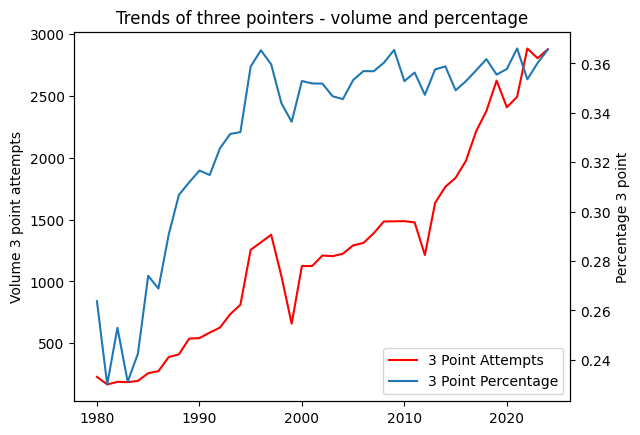

In [11]:
#How have the frequency and accuracy of 3 point shooting chaged?
three_point_trends = nba.groupby('season')[['x3pa', 'x3p_percent']].mean().reset_index()

ax1 = plt.subplot()
ax2 = plt.twinx()

ax1.plot(three_point_trends['season'], three_point_trends['x3pa'], label = '3 Point Attempts', color = 'red')
#ax1.legend()
ax1.set_ylabel("Volume 3 point attempts")


ax2.plot(three_point_trends['season'], three_point_trends['x3p_percent'], label = '3 Point Percentage')
#ax2.legend()
ax2.set_ylabel("Percentage 3 point")

plt.title("Trends of three pointers - volume and percentage")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)



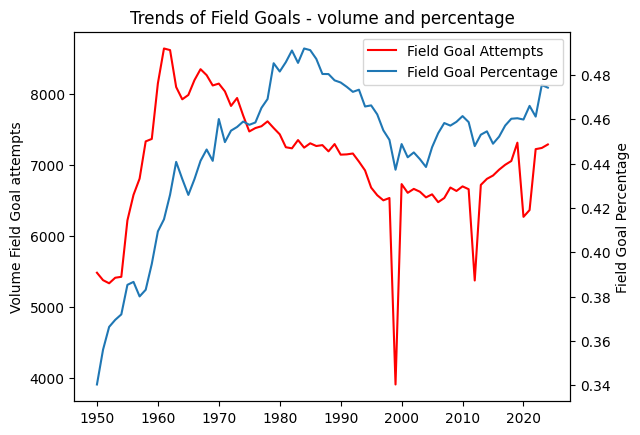

In [39]:
#How have the overall field goal evolved?
field_goal_trends = nba.groupby('season')[['fga', 'fg_percent']].mean().reset_index()

ax1 = plt.subplot()
ax2 = plt.twinx()

ax1.plot(field_goal_trends['season'], field_goal_trends['fga'], label = 'Field Goal Attempts', color = 'red')
#ax1.legend(loc = 1)
ax1.set_ylabel("Volume Field Goal attempts")

ax2.plot(field_goal_trends['season'], field_goal_trends['fg_percent'], label = 'Field Goal Percentage')
#ax2.legend()
ax2.set_ylabel("Field Goal Percentage")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)

plt.title("Trends of Field Goals - volume and percentage");

Observations:

* Field goal attempts were down in late 90s, 2011 and 2019/2020. This was due to NBA lockouts and also COVID in 2020.
* Field goal attempts peaked early 60s while percentages didn't peak until mid 80s.
* As volume of three point shots increase, so do the shooting percentages. This could indicate: 
    * Increase in skill level. 
    * Players who could shoot the ball from three getting more minutes. 
    * Teams looking for more "3&D" type players - versatile defenders, who could also shoot the ball

<h2>Pace of Play</h2>

- How has the pace of the game (possessions per game) changed over time?
- How has the shot clock and other rule changes impacted change?

Text(0, 0.5, 'Pace')

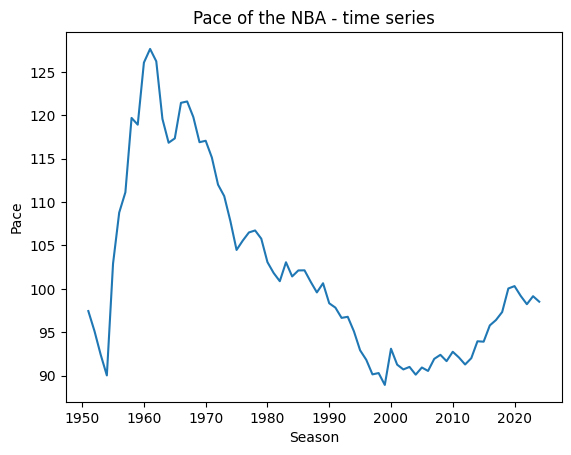

In [13]:
#How has the pace of the game (possesions per game) changed over time?
nba_summ = team_summ[team_summ['lg'] == "NBA"]

nba_summ.groupby('season')['pace'].mean().plot(kind='line')
plt.title("Pace of the NBA - time series")
plt.xlabel("Season")
plt.ylabel("Pace")

Text(0, 0.5, 'Offensive Ratings')

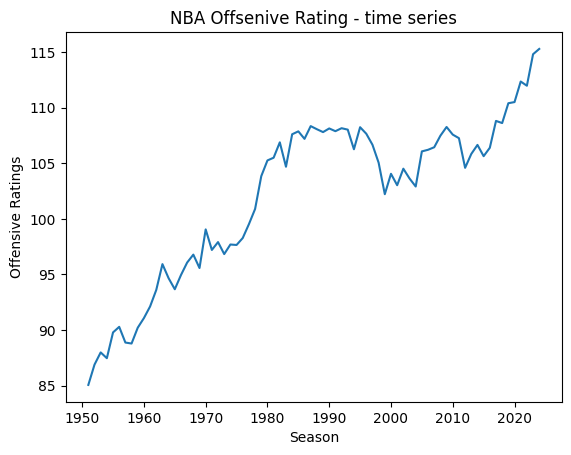

In [14]:
#How has Offensive and Defensive rating changed with the change in pace
#pace_ratings = nba_summ.groupby('season')[['o_rtg', 'd_rtg']].sum().reset_index()

nba_summ.groupby('season')['o_rtg'].mean().plot(kind='line')
plt.title("NBA Offsenive Rating - time series")
plt.xlabel("Season")
plt.ylabel("Offensive Ratings")

#nba_summ.groupby('season')[['o_rtg', 'd_rtg']].mean().reset_index()

#plt.bar(pace_ratings['season'], pace_ratings['o_rtg'], label = "Offensive Rating", color = 'red')
#plt.bar(pace_ratings['season'], pace_ratings['d_rtg'], label = "Defensive Rating")

#plt.legend()

<h3>Pace and Play Analysis</h3>


At the current pace of the modern NBA, it has not been the fatest the league has seen. However, with a higher pace and as players continue to get better, the NBA offsenive rating is continuing to increase.
Defensive ratings showed no significant difference from offensive ratings.

The introduction of the shot clock in 1954 led to large increase in the pace of the NBA. At the time, many considered the NBA boring, as teams would hold the ball when they had a lead. To counter this, the NBA introduced a 24 second shot clock, where the offensive team must hit the rim within 24 seconds of possession, otherwise it would result in a turnover.

From 1960 onwards, the pace of the game slowly started decreasing, with offesnive rating increasing. Basketball started to slow down, with teams relying on their Power Forwards and Centers to score with post moves. Regardless of how slow the game was, offesnive ratings continued to increase as the level of skill NBA players also continued to increase.
Around the early 2000s was when the game was at it's slowest. Defensive three seconds was yet to be a rule within the game, which made it harder to drive to the basket.



In 2001, NBA owners approved of a rule change that introduced defensive three seconds and removed "Illegal Defense". This rule was that the defensive player must be "actively guarding an opponent", meaning at an arms length away from an offensive player. This rule was implemented in the hope that it would increase the flow of the game. Slowly over time, the pace of the NBA had started to increase and offensive ratings increased as well.

<h2>Player performance and roles</h2>

- How have player statistics such as Rebounds, assists and steals blocks changed over time?
- How have the roles and positions of players evolved? 

Index(['season', 'lg', 'team', 'abbreviation', 'playoffs', 'g', 'mp_per_game',
       'fg_per_game', 'fga_per_game', 'fg_percent', 'x3p_per_game',
       'x3pa_per_game', 'x3p_percent', 'x2p_per_game', 'x2pa_per_game',
       'x2p_percent', 'ft_per_game', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game'],
      dtype='object')

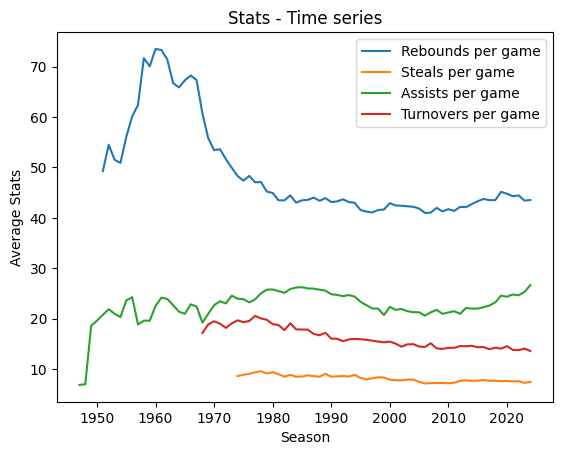

In [40]:
#How have Rebounds, Assists, Steals and Blocks per game changed over time?
display(team_stat.columns)
stat_by_season = team_stat.groupby('season')[['trb_per_game','stl_per_game', 'ast_per_game', 'tov_per_game']].mean().reset_index()

plt.plot(stat_by_season['season'], stat_by_season['trb_per_game'], label = 'Rebounds per game')
plt.plot(stat_by_season['season'], stat_by_season['stl_per_game'], label = 'Steals per game')
plt.plot(stat_by_season['season'], stat_by_season['ast_per_game'], label = 'Assists per game')
plt.plot(stat_by_season['season'], stat_by_season['tov_per_game'], label = 'Turnovers per game')
plt.legend()
plt.title("Stats - Time series")
plt.xlabel("Season")
plt.ylabel("Average Stats")
plt.show()

Text(0, 0.5, 'Ratio')

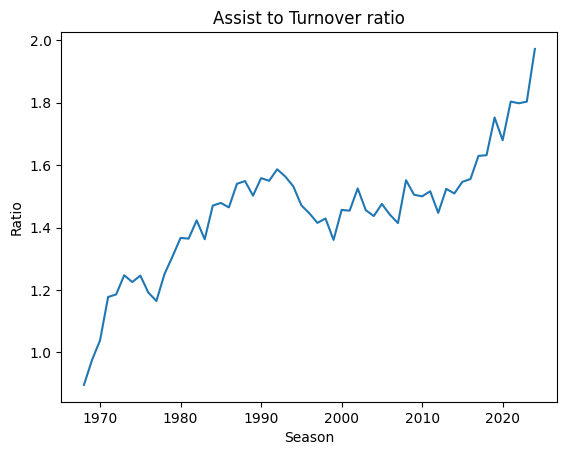

In [16]:
#Assists to turnover ratio
ast_tov = team_stat.copy()

ast_tov.loc[:,'ast_tov_ratio'] = ast_tov.loc[:,'ast_per_game'] / ast_tov.loc[:,'tov_per_game']

ast_tov.groupby('season')['ast_tov_ratio'].mean().plot(kind='line')
plt.title('Assist to Turnover ratio')
plt.xlabel('Season')
plt.ylabel('Ratio')


Observations:
* High rebounding numbers in the early 60s. Likely due to less skilled players, shooting technique and team strategies not well developed.
* Assists relatively stable, with slight increse towards the present day
* Turnovers declining - more skilled players and better team schemes protecting or scoring the ball
* Steals per game stable.
* Assists to turnover ratio increasing, indicating either assists are going up, turnovers are going down or both, as players get better.

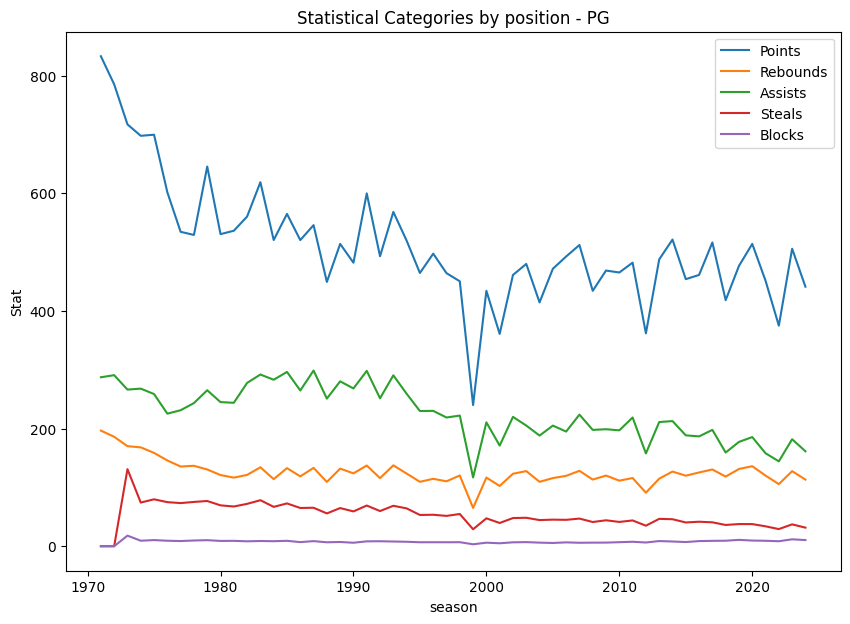

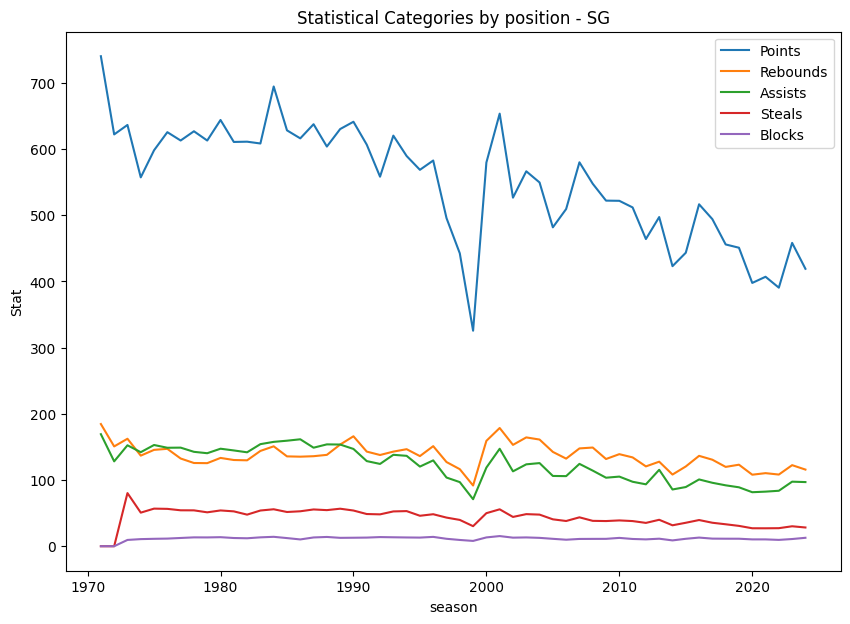

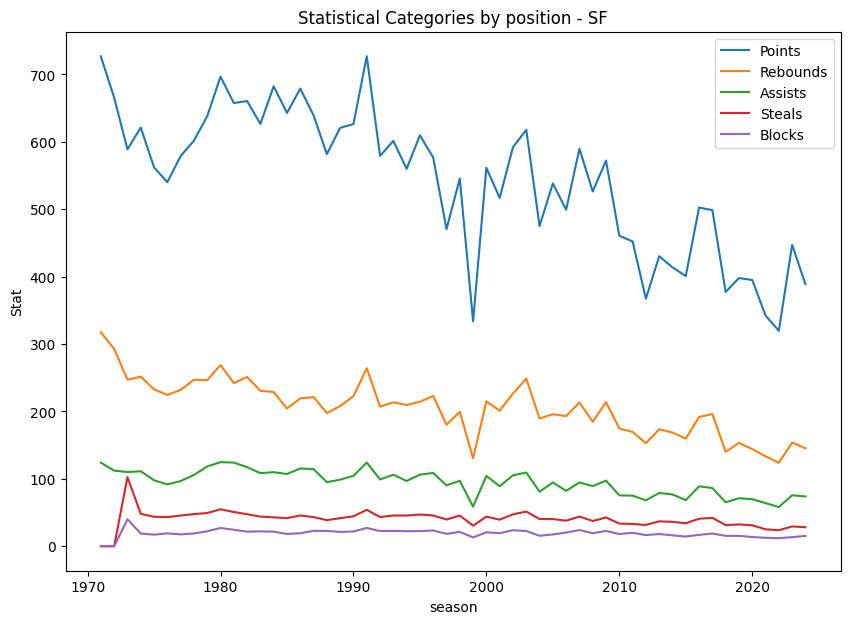

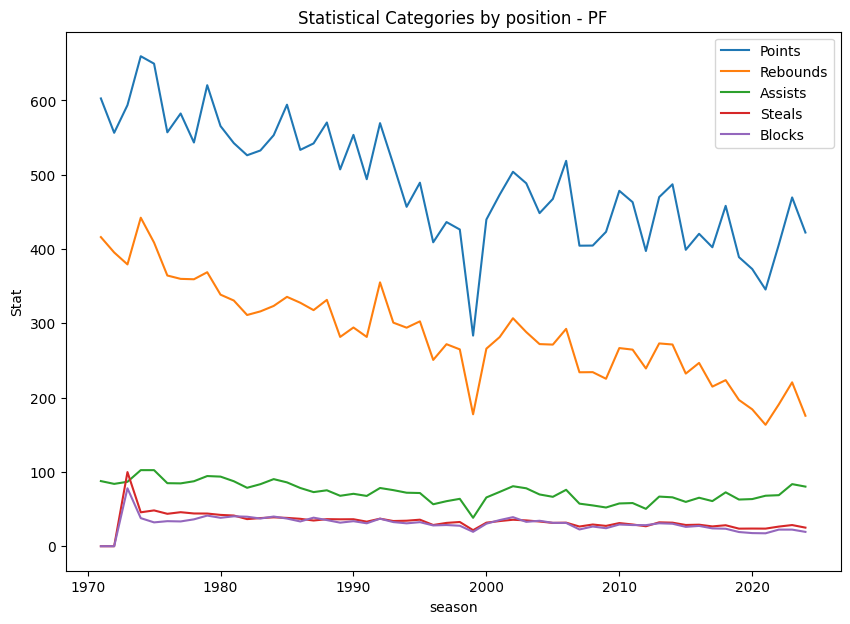

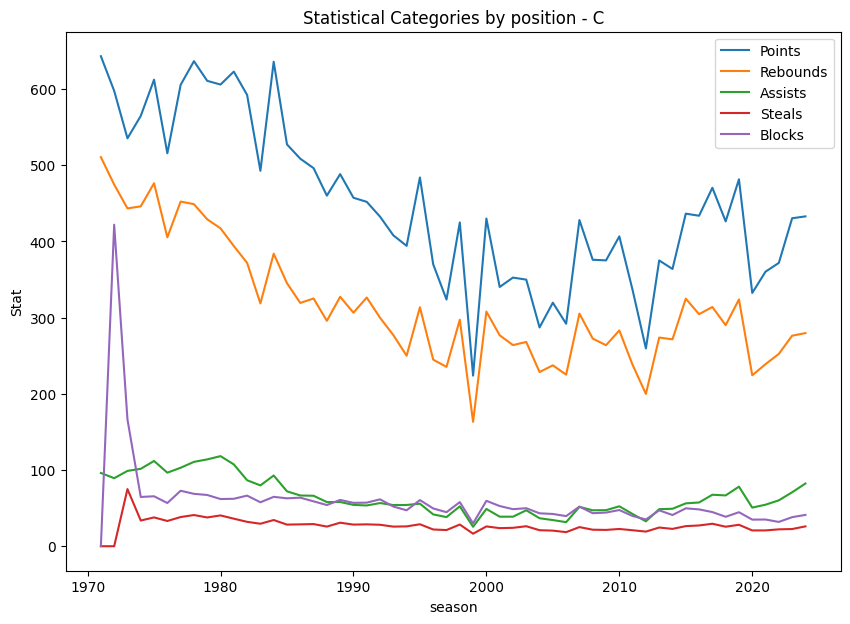

In [141]:
#Player positions and stats
player_tot.columns
player = player_tot.copy()

positions = ['PG', 'SG', 'SF', 'PF', 'C']
stat_category = ['pts', 'trb', 'ast', 'stl', 'blk']

df_player = player[(player['pos'].isin(positions)) & (player['season'] > 1970)]

totals_by_season_by_year = df_player.groupby(['pos', 'season'])[stat_category].mean().reset_index()

for position in positions:
    plot_data = totals_by_season_by_year[totals_by_season_by_year['pos'] == position].groupby("season")[stat_category].sum().reset_index()
    plt.figure(figsize=(10,7))
    sns.lineplot(data = plot_data, x = 'season', y = 'pts', label = 'Points')
    sns.lineplot(data = plot_data, x = 'season', y = 'trb', label = 'Rebounds')
    sns.lineplot(data = plot_data, x = 'season', y = 'ast', label = 'Assists')
    sns.lineplot(data = plot_data, x = 'season', y = 'stl', label = 'Steals')
    sns.lineplot(data = plot_data, x = 'season', y = 'blk', label = 'Blocks')
    plt.title(f"Statistical Categories by position - {position}")
    plt.ylabel("Stat")
    plt.show()




<h2>Team strategies</h2>

- How have team strategies shifted?
- What are the trends in team offensive and defensive ratings over the years?


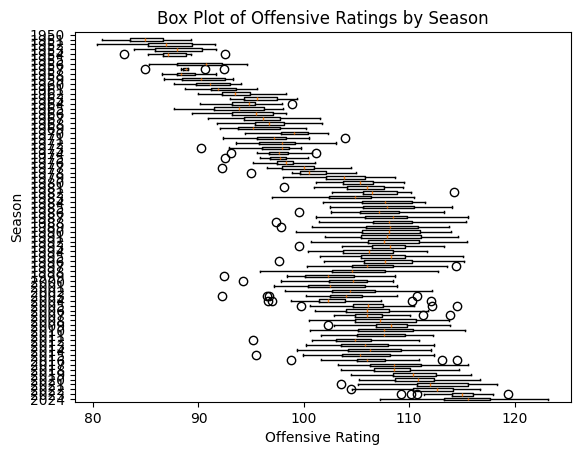

In [ ]:
seasons = nba_summ['season'].unique()

box_data = nba_summ.groupby('season')['o_rtg'].mean().reset_index()


year = nba_summ['season'].unique()
box_data_ortg = [nba_summ[nba_summ['season'] == season]['o_rtg'] for season in year]




plt.boxplot(box_data_ortg, tick_labels= year, vert=False)
plt.title('Box Plot of Offensive Ratings by Season')
plt.xlabel('Offensive Rating')
plt.ylabel('Season')
plt.show()

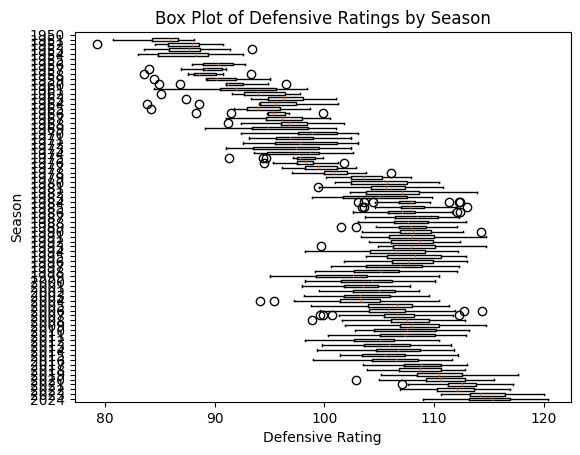

In [ ]:
unique_seasons = nba_summ['season'].unique()

#box_data = [nba_summ[nba_summ['season'] == season]['o_rtg'] for season in seasons]

box_data = nba_summ.groupby('season')['d_rtg'].mean().reset_index()


year = nba_summ['season'].unique()
box_data_drtg = [nba_summ[nba_summ['season'] == season]['d_rtg'] for season in year]




plt.boxplot(box_data_drtg, tick_labels= year, vert=False)
plt.title('Box Plot of Defensive Ratings by Season')
plt.xlabel('Defensive Rating')
plt.ylabel('Season')
plt.show()

Offensive and defensive ratings continue to increase however, no significant differences from each other

<h2>Impacts of rule changes</h2>

There are four main rule changes that saw the evolution of basketball.

1. Introduction to the three point line
* The three point line was introduced in 1979. When introduced, few teams took three point attempts. Teams weren't used to shooting that distance and revolved their teams around bigger players to score under the basket.
* As the players and teams improved, there was a boom in taking three point shots in the early 2010s. This was when teams found out the value of the three pointer. A player only needed to shoot 33% from the three in order to have equal points per possession as a player shooting 50% from within the three point line. 
* NBA teams today seek player who can shoot above this 33% from the three point line and elite shooters surpassing 40%+

     The NBA experimented with moving the three point line closer in the 1994-95 season. This change decreased the three point line from 23 ft 9 in to 22 ft around the basket and ultimately returned it back to it's original spot in thr 1997-98 season. This rule change was designed to increase scoring and decrease physicality. The NBA at this point was seeing a decline in scoring. This change in the rule saw many players, who may not normally shoot a three shoot a shot and we can see that in the shooting trends data within the 90s. 

    The NBA returned the three point line to it's original spot as they were not expecting the results they wanted. There was a surge in 3 point shooting but the decrease in physicality was still present in the NBA. Now teams heavily rely on three point shooting.

2. Defensive changes
* Introduction of illegal defense. Power forwards and centers were no longer allowed to camp in the paint and had to be in guarding position to an offensive player at least an arms length away. 
* Hand checking was removed from the game. This favoured the offensive player as players were forced to slide their feet and couldn't push themselves back into a favourable defensive position.

    These two defensive changes led to an increase in the pace of basketball.

3. Shot clock
* This rule stopped teams from holding on to the ball when they had a small lead, as it would result in a turnover. This increased the pace of the game during it's introduction.